## Frequentist Statistics

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

### Measure of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [3]:
x = st.skewnorm.rvs(10, size=1000)
x[:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

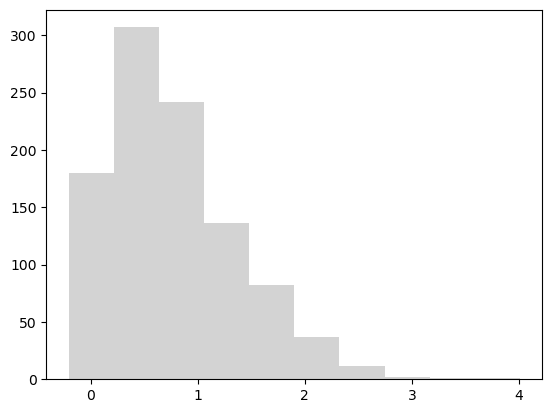

In [4]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [5]:
xbar = x.mean()
xbar

np.float64(0.7719211854654121)

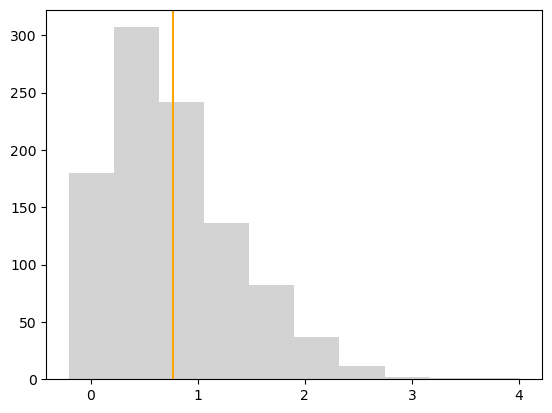

In [6]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [7]:
np.median(x)

np.float64(0.6514202574279577)

#### Mode

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

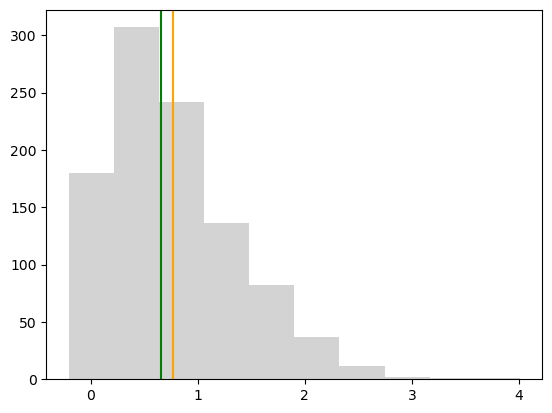

In [8]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measure of Dispersion

#### Variance

$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $

In [9]:
x.var()

np.float64(0.35528419278021617)

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:

$ \sigma = \sqrt{\sigma^2} $

In [10]:
x.var()**(1/2)

np.float64(0.5960572059628305)

In [13]:
sigma = np.std(x)
sigma

np.float64(0.5960572059628305)

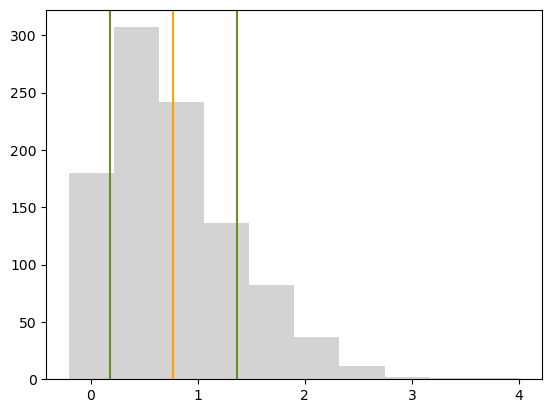

In [14]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_{\bar{x}}$:

$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $

In [15]:
sigma/(x.size)**(1/2)

np.float64(0.018848983865986414)

In [16]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

np.float64(0.018858415432183823)

In [17]:
st.sem(x, ddof=0)

np.float64(0.018848983865986414)

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.


### Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**:

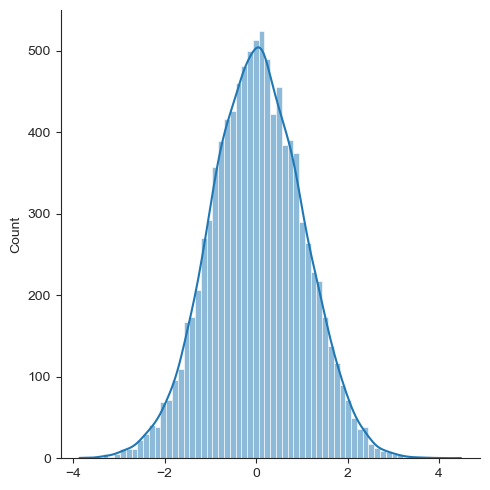

In [19]:
x = np.random.normal(size=10000)
sns.set_style('ticks')
_ = sns.displot(x, kde=True)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [20]:
x.mean()

np.float64(0.018836604091035616)

In [21]:
x.std()

np.float64(1.0018321110053832)

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [24]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.52911267, -0.50769198,  0.10004863, -1.39622913,  0.49271935,
       -2.01500844, -0.5347508 ,  1.00549532,  0.40440815, -0.86000248])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [25]:
x_sample.mean()

np.float64(-0.38401240463918257)

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [26]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

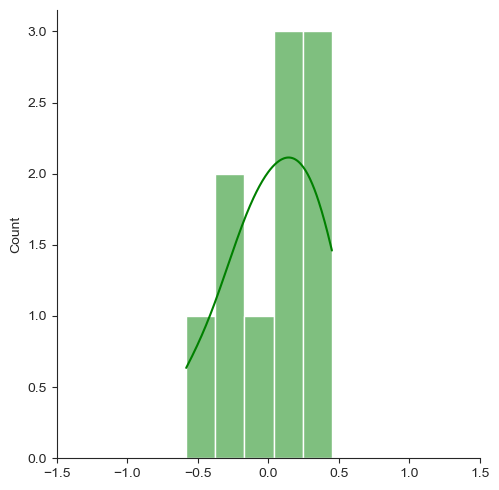

In [27]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

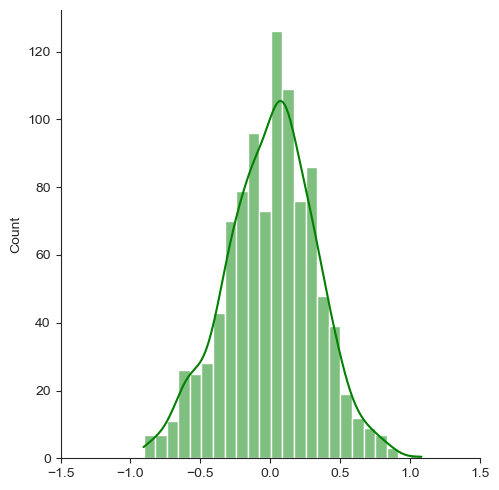

In [28]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

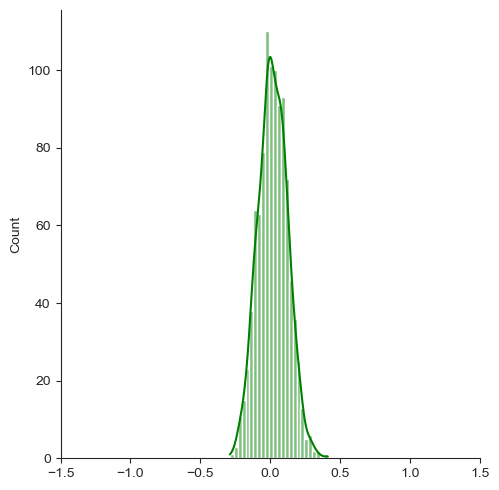

In [29]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

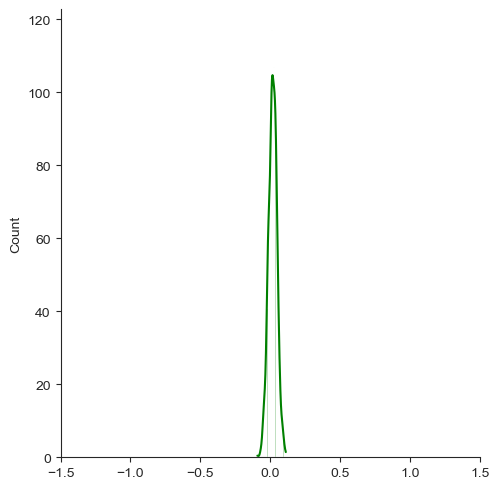

In [30]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

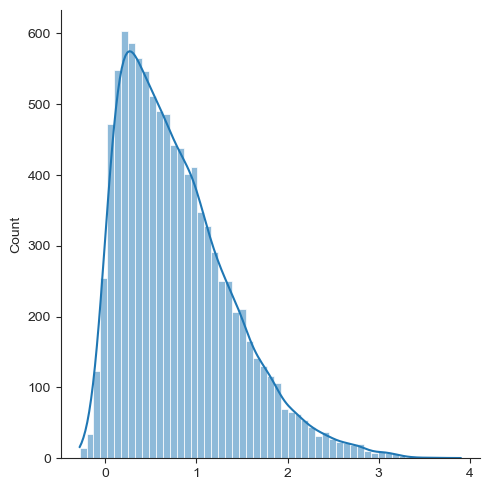

In [31]:
s = st.skewnorm.rvs(10, size=10000)
_ = sns.displot(s, kde=True)

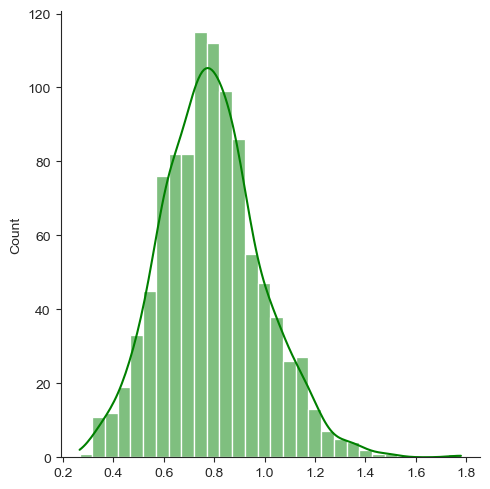

In [32]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

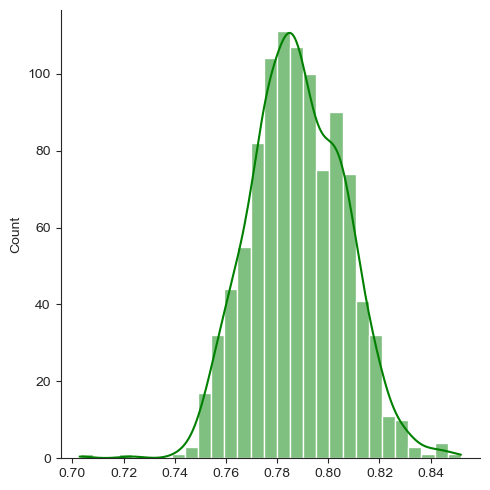

In [33]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

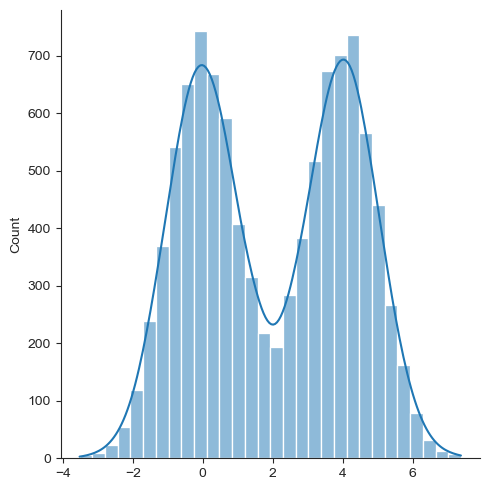

In [35]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
_ = sns.displot(m, kde=True)

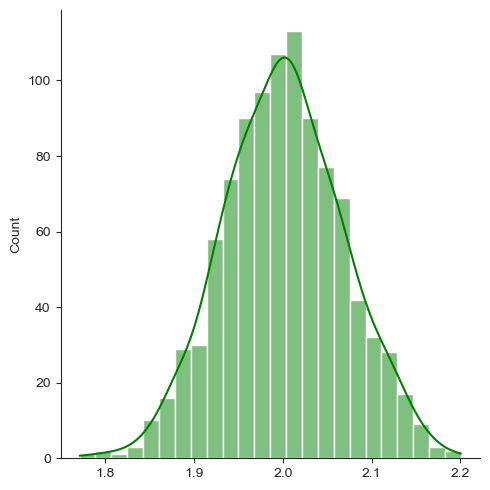

In [36]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Uniform distributions

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

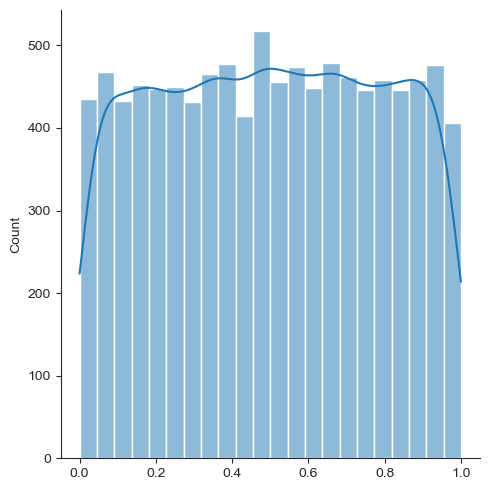

In [37]:
u = np.random.uniform(size=10000)
_ = sns.displot(u, kde=True)

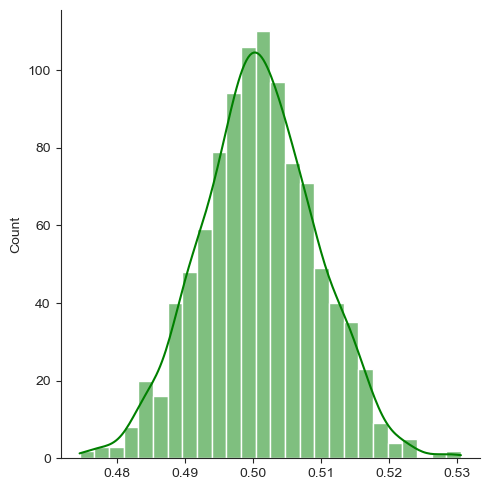

In [38]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

## Z-Score

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:

$ z = \frac{x_i-\mu}{\sigma} $

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%: